## Deja Brew
Introduction to Data Science (MATH 4100 / CS 5963), University of Utah

#### Final Project 
Ja-Rey Corcuera U1156525@utah.edu
Brianna Mendoza U1189033@utah.edu


## Background and Motivation
As college students, it seems that coffee has become a necessary fuel for many of us, worldwide. Though coffee may serve this purpose for students on a college campus, coffee can be more than that. What we hope to explore with this data is whether coffee has other significant characteristics, other than just caffeination. Can we explore its features such as acidity level, roast, place of origin, etc. to create a different relationship and experience with coffee? Do these things make a difference in the cup you drink? As people who drink coffee regularly, can there be more to it?

The goal of this data search is just to provide the people who drink coffee with more information. There is no ground-breaking, hidden information in this data, rather it is all information that we may already inherantly know just by experiencing coffee, but that we can now categorize into specific qualities that we enjoy the most. As a result, this data will allow the user to identify where they can find the perfect cup that has the most of what they love. 
We hope that what this data does the most is enhance the coffee-drinking experience of all who have access to it.

## Project Objectives
The core objectives of this project is quantify the many qualitative characteristics of coffee and thoroughly understand what they mean in a numerical sense. We want to identifying the important characteristics of coffee from around the world and understand the correlations, if there are any, between each one. Would we be able to recommend a coffee to a user based on desired characteristics, price, or origin? Can the agtron score predict the overall rating of the brew? What taste profiles do the highest rated coffees have, and is there a trend? Where does most coffee come from? Where does it go?
All of the questions can provide a more in depth understanding of each brew. Whether its amroma thats important to the drinker, or merely price, there may be a lot that results in the perfect poor. 

Coffee drinking, to most, is just a leisure activity, or a necessary start to their morning. This project can broaden a person’s knowledge of the beverage and heighten their experiences with it as a delicacy, not just as an energy booster.

## Background

**State-of-the-art: you could describe briefly other techniques that have been applied to your dataset or similar (but not exact) datasets; you could also talk about examples/applications where the same or similar data analysis techniques you choose in your project have been applied.** 

## Data
The data for this project was obtained from The Coffee Review website (https://www.coffeereview.com/review/?locations=na), where a group of coffee connoisseurs have taken the time since 1997 to thoroughly examine coffee from all over the world. We scraped this site for over 3000 reviews of coffee ground here in the United States.

While the data that we are working with comes from just the reviews, we also read the information on the rest of the website concerning how each coffee is rated, ethical considereations of how the coffee is sourced, and other endeavors The Coffee Review is a part of, to help better undertand their motive for creating this site and rating each coffee

Here's an example of one review from the website:
<img src="review.png" width="550">


## Ethical Considerations

Our first and most important ethical consideration was the sourcing of each coffee. We were concerned about the conditions on the farms, pricing, etc. What we found through this website was that much of the coffee was Fair Trade Certified, meaning that farmers were paid a fair price for their produce that would economically sustain them and ensure a return for their labor. Though we can’t know for sure that all of the transactions were Fair Trade Certified, we know that there is increasing social pressure to ensure that it is, or will become Fair Trade Certified.

Secondly, another concern we came across was how this website would affect the roasting company’s business, and even the farmer’s business. We suppose that if many people rely on this website for good coffee, it would influence where they get theirs from. On the other hand,
could the data analysis on our end affect the trade flow among buyers and sellers on any level? We concluded that we would probably have little impact, as this data is mostly focused on quantitative analysis, rather than qualitative, which is what coffee connoisseurs would most be interested in. 

Lastly, we recognize the inherant biases of these reviews, as they are conducted by a small group of professionals. A lot could impact the way each coffe is rated, but we are trusting that each review is done in the most unbiased way possible. 

## Data Processing

In [158]:
from urllib.request import Request, urlopen
import requests
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
import numpy as np
import sys
import pandas as pd
import re
import random
import seaborn as sns
import statsmodels.formula.api as sm
import ssl
from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import geopandas as gpd
import geoplot
import warnings
import scipy.stats as stats
from tkinter import *
from tkinter import messagebox
import tkinter as tk
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
NavigationToolbar2Tk)
warnings.filterwarnings('ignore')

### Webscraping

In [295]:
page_count = 286 # number of pages to scrape from (each page has 20 reviews)
coffee_df = pd.DataFrame()
counter = 0
run = False # Make true to start scraping

if run:
    # Loop through each webpage of reviews
    for page in range(1, page_count):

        url = "https://www.coffeereview.com/review/page/" + str(page) +  "/?locations=na"
        print("Opening page URL:", url)

        ssl._create_default_https_context = ssl._create_unverified_context
        req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        html = urlopen(req).read()

        soup = BeautifulSoup(html, 'html.parser')

        time.sleep(random.uniform(0.25, 0.75)) # Random delay between accessing pages

        # Loop through all reviews in the current webpage and find attributes
        for curr_review in soup.find_all(class_="review-template"):

            review_url = curr_review.find_all('a', href=True)[1]['href']
            #print("Opening review URL:", review_url)

            review_req = Request(review_url, headers={'User-Agent': 'Mozilla/5.0'})
            review_html = urlopen(review_req).read()

            review_soup = BeautifulSoup(review_html, 'html.parser')

            time.sleep(random.uniform(0.1, 0.3)) # Random delay between accessing reviews

            attributes = {}

            roaster = curr_review.find("p", class_="review-roaster").get_text()
            attributes["Roaster"] = roaster

            name = review_soup.find("h1", class_="review-title").get_text()
            attributes["Name"] = name

            rating = review_soup.find('span', class_="review-template-rating").get_text()
            attributes["Rating"] = rating

            i = 1
            curr_attribute = ""
            for tag in review_soup.find_all(class_="review-template-table")[0].find_all('td'):
                if i % 2 == 1:
                    curr_attribute = tag.get_text()[:-1]
                else:
                    attributes[curr_attribute] = tag.get_text()
                i = i + 1

            i = 1
            curr_attribute = ""
            for tag in review_soup.find_all(class_="review-template-table")[1].find_all('td'):
                if i % 2 == 1:
                    curr_attribute = tag.get_text()[:-1]
                else:
                    value = re.sub('\s+', '', tag.get_text())
                    attributes[curr_attribute] = value
                i = i + 1 

            # Append all attributes of this review to the dataframe
            coffee_df = coffee_df.append(attributes, ignore_index=True)

            counter = counter + 1
    
    print("Writing dataframe to csv file")
    coffee_df.to_csv('coffeereview.csv', index=False)
    coffee_df

Here We have scraped all of the data from the website. We use beautiful soup to sift through the HTML, identifying which tags contain the relevant information.  

### Data Cleanup & Wrangling

In [131]:
# Read dataframe from csv file
coffee_df =  pd.read_csv("coffeereview.csv")

# Extract both agtron readings from agtron attribute
coffee_df[["Agtron Ext", "Agtron Gnd"]] = coffee_df["Agtron"].str.split("/", expand=True)

# Drop reviews that don't record agtron values
coffee_df = coffee_df.drop(coffee_df[coffee_df.Agtron == "NA/NA"].index)

# Drop reviews that don't record origin location
#coffee_df = coffee_df.drop(coffee_df[coffee_df["Coffee Origin"] == "Not disclosed."].index)
coffee_df = coffee_df.drop(coffee_df[coffee_df["Coffee Origin"].str.contains("Not disclosed") == True].index)

# Drop reviews that don't record external agtron values
coffee_df = coffee_df.drop(coffee_df[coffee_df["Agtron Ext"] == ""].index)

# Drop unnecessary attributes
coffee_df = coffee_df.drop(columns = ["With Milk", "Acidity", "Acidity/Structure", "Agtron", "Body", "Aftertaste", "Review Date"])

# Drop all reviews with missing information
coffee_df = coffee_df.dropna()

# Filter out reviews that use non-US dollars
coffee_df = coffee_df[coffee_df["Est. Price"].str[0] == "$"]

# Filter out reviews that don't use ounces
coffee_df = coffee_df[(coffee_df["Est. Price"].str.contains("ounce") == True) | (coffee_df["Est. Price"].str.contains("oz") == True)]

# Filter out all other unordinary reviews
coffee_df = coffee_df[(coffee_df["Est. Price"].str.contains("CAD") == False) & (coffee_df["Est. Price"].str.contains("pounds") == False) & (coffee_df["Est. Price"].str.contains("online") == False) & (coffee_df["Est. Price"].str.contains("NTD") == False) & (coffee_df["Est. Price"].str.contains("g") == False) & (coffee_df["Est. Price"].str.contains("grams") == False)]

# Calculate dollars per ounce from estimated price
dollarsperoz_arr = []
for arr in coffee_df["Est. Price"].str.split("/"):
    dollarsperoz = float(arr[0].split("$")[1]) / float(arr[1].strip().split(" ")[0])
    dollarsperoz_arr.append(round(dollarsperoz, 2))
    
# Insert dollars per ounce column into datafame
coffee_df.insert(7, "DollarsPerOz", dollarsperoz_arr)

# Drop Est. Price column after converting to DollarsPerOz
coffee_df = coffee_df.drop(columns = ["Est. Price"])


# Add a column that represents roast level as a numerical variable
coffee_df["Roast_Level_num"] = coffee_df["Roast Level"].map({'Light':0, 'Medium-Light': 1, 'Medium': 2, 'Medium-Dark': 3, 'Dark': 4, 'Very Dark': 4})

# Parse columns to appropriate data types
change_type = {
    'Rating': int,
    'DollarsPerOz': float,
    'Aroma': int,
    'Flavor': int,
    "Agtron Ext": int,
    "Agtron Gnd": int,
    "Roast_Level_num": int
     }

coffee_df = coffee_df.astype(change_type).reset_index(drop=True)

Here the data is cleaned: columns are added and dropped. There were a few reviews that did not contain all the information that we needed from them, so they were dropped. For example, some reviews did not contain agtron levels or places of origin, so they were dropped. We understand that dropping these does limit, in some sense, the story we are able to tell about each roast, but there were so little dropped in comparison to the rest of the reviews, that it would not affect the bigger picture. 


From each review, there were some attributes in the ratings that we did not feel were relevant, or that didn't show up often enought to take into account, things like how the coffee tasted with milk, body, or the acidity structure. These seemed less relevant to the story we were trying to tell nuerically. 


In order to keep the data at bay, we restricted our data set to only roasts that were sold in U.S. dollars, as to make other calculations easy and to make the data more understandable. After reducing to only the roasts sold in the U.S., each price was normalized to price per ounce. This will become helpful later through our correlation and regression analysis, along with creating our predictor.


We also converted the roast level to integer representations to be able to numerically integrate them into other regressioins, plots, etc. Each roast level was assigned a number between 0 and 4, light being 0, and dark being 4. 


Lastly, we ensured that all the necessary values were converted to floats so that they would be usable throughout the project. 

In [132]:
# Filter out reviews where coffee origin location is unknown
countries_df =  pd.read_csv("world.csv")
countries = countries_df["en"].values

count = 0
for origin in coffee_df["Coffee Origin"].str.split(","):
    count = count + 1
    found = False
    for name in origin:
        for country in countries:
            if country.lower() in name.lower():
                found = True
                coffee_df.loc[count-1, "Coffee Origin"]=country
                break
                
        if found == True:
            break

    if found == False:
        coffee_df.loc[count-1, "Coffee Origin"]="NA"

coffee_df = coffee_df.drop(coffee_df[coffee_df["Coffee Origin"]== "NA"].index).reset_index(drop=True)

In [133]:
# Add lat/long coords of origin country 
coffee_df["Latitude"] = ""
coffee_df["Longitude"] = ""
latlong_df =  pd.read_csv("latlongcountries.csv")
countries = latlong_df["Country"]

count = 0
for origin in coffee_df["Coffee Origin"]:
    count = count + 1
    found = False

    for country in countries:
        if country.lower() == origin.lower():
            lat = latlong_df[latlong_df.Country == country].Latitude.values[0]
            long = latlong_df[latlong_df.Country == country].Longitude.values[0]

            coffee_df.loc[count-1, "Latitude"]=lat
            coffee_df.loc[count-1, "Longitude"]=long

            found = True
            break
            
    if found == False:
            coffee_df.loc[count-1, "Latitude"]=0
            coffee_df.loc[count-1, "Longitude"]=0

In order to effectively portray our categorical data, the place of origin, we were able to find a csv file with the latititude and longitude of every country in the world, and were able to map these locations to places of origin of each of the coffee. The data is merely loaded here but is used effectively further down in the project. 

In [134]:
# Filter out reviews where roaster location is unknown or not in the U.S.
states_df =  pd.read_csv("states.csv")
states = states_df["State"].values

count = 0
for location in coffee_df["Roaster Location"].str.split(","):
    count = count + 1
    found = False
    for name in location:
        for state in states:
            if state.lower() in name.lower():
                found = True

                coffee_df.loc[count-1, "Roaster Location"]=state
                break
                
        if found == True:
            break

    if found == False:
        coffee_df.loc[count-1, "Roaster Location"]="NA"

coffee_df = coffee_df.drop(coffee_df[coffee_df["Roaster Location"]== "NA"].index).reset_index(drop=True)
coffee_df = coffee_df.drop(coffee_df[coffee_df["Agtron Ext"] > 200].index)

If location was not available in any given review, that review was dropped. 

In [135]:
# Write cleaned dataframe to csv
coffee_df.to_csv('coffeereview_cleaned.csv', index=False)
coffee_df.head(6)

,Roaster,Name,Rating,Roaster Location,Coffee Origin,Roast Level,DollarsPerOz,Aroma,Flavor,Agtron Ext,Agtron Gnd,Roast_Level_num,Latitude,Longitude
0,Paradise Roasters,Colombia Finca La Primavera Sidra,96,Minnesota,Colombia,Light,4.00,9,10,64,82,0,4.0,-72.0
1,SkyTop Coffee,Ethiopia Anaerobic Shantawene,94,New York,Ethiopia,Medium-Light,1.67,9,9,58,80,1,8.0,38.0
2,Jaunt Coffee Roasters,Ethiopia Bensa Asefa Qonqana,94,California,Ethiopia,Light,2.17,9,9,64,86,0,8.0,38.0
3,Magnolia Coffee,Ethiopia Durato Bombe,94,North Carolina,Ethiopia,Medium-Light,1.58,9,9,58,78,1,8.0,38.0
4,SkyTop Coffee,Ethiopia Washed Shantawene,94,New York,Ethiopia,Medium-Light,1.67,9,9,60,78,1,8.0,38.0
5,Old Soul Co.,Democratic Republic of Congo Mighty Peace Mapendo,93,California,Congo,Medium-Light,1.67,9,9,56,74,1,-1.0,15.0


### Analysis

We begin our analysis here. Creating a data frame of the cleaned csv, we are able to both numerically and visusally represent our data. We are able to see what columns are in our data frame, we can see the numerical correlation between each of the paramters, we can load a visusal representation of each correlation through a heat map, and we can see how each parameter relates to the other through a pair plot. 
We can see individual relationships between each paramter, along with a general, big-picture relation overall. 

In [159]:
coffee_df = pd.read_csv("coffeereview_cleaned.csv")

In [137]:
coffee_df.corr()

,Rating,DollarsPerOz,Aroma,Flavor,Agtron Ext,Agtron Gnd,Roast_Level_num,Latitude,Longitude
Rating,1.000000,0.329637,0.700781,0.771274,0.436810,0.429914,-0.404262,0.035657,0.037028
DollarsPerOz,0.329637,1.000000,0.228930,0.237892,0.153774,0.177541,-0.170426,0.186845,-0.241900
Aroma,0.700781,0.228930,1.000000,0.513827,0.315417,0.310495,-0.294879,0.040223,0.041651
Flavor,0.771274,0.237892,0.513827,1.000000,0.370676,0.330797,-0.315283,0.027409,0.048236
Agtron Ext,0.436810,0.153774,0.315417,0.370676,1.000000,0.815001,-0.852397,0.086704,-0.061602
Agtron Gnd,0.429914,0.177541,0.310495,0.330797,0.815001,1.000000,-0.901244,0.080035,-0.048068
Roast_Level_num,-0.404262,-0.170426,-0.294879,-0.315283,-0.852397,-0.901244,1.000000,-0.077209,0.048949
Latitude,0.035657,0.186845,0.040223,0.027409,0.086704,0.080035,-0.077209,1.000000,-0.459271
Longitude,0.037028,-0.241900,0.041651,0.048236,-0.061602,-0.048068,0.048949,-0.459271,1.000000


Running the correlations for each parameter lets us know which characteristics have relationships. We can see that agrtron grade before the bean is ground and agtron grade after its ground have a strong positive correlation. This imples that the color a bean starts at may be telling of the color that it will end at. Of course this may depend on a lot of different variables, and is fairly common sense, but we can see that the data supports this. 
But let us examine another correlation that maybe isn't so straight forward. The correlation between latitude and agtron grades is very strong and positive. This may be hard to understand why by examining this table, but it may become more clear with further analysis. 

The below heat map matrix allows us to visualize the correlations calculated above. As supported by the figures, we can see that agtron grade before and after grind have a strong positive correlation, shown by a very dark square. This aligns with the .815 correlation value seen above.

It may be seen a little more clearly now that roast level has a negative correlation with almost every other parameter. The higher the roast level, the lower the rating, the roast may cost slightly less, there may be less aroma, less body, less flavor. This checks out, as a darker roast usually turn out having a much more bitter taste.

You'll notice aroma, and flavor both have slight positive correlations with rating. This tells us that the raters value  a coffee with lots of aroma, and that's full of flavor. 
According to the Cofffee Review website a coffee with score high on the aromatic scale if the notes are flavorful and complex. They look for natural sweetness and not too much bitterness. This occurs when a coffee is skillfully processed and is allowed for the natural flavor compounds to be extracted, either through dry methods or wet methods. 

<AxesSubplot:>

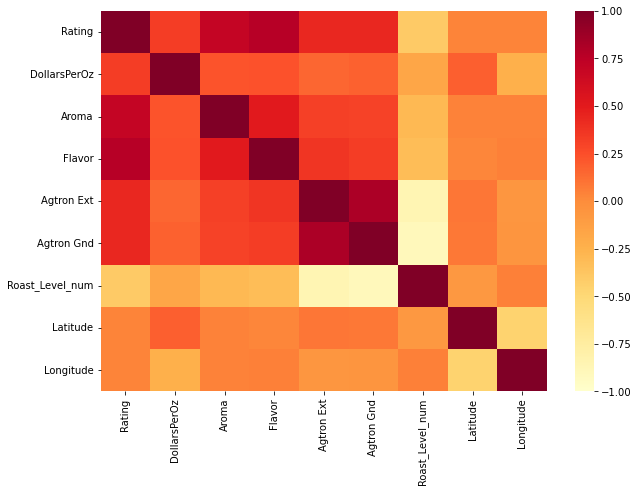

In [138]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data = coffee_df.corr(), vmin = -1, vmax = 1, cmap="YlOrRd")

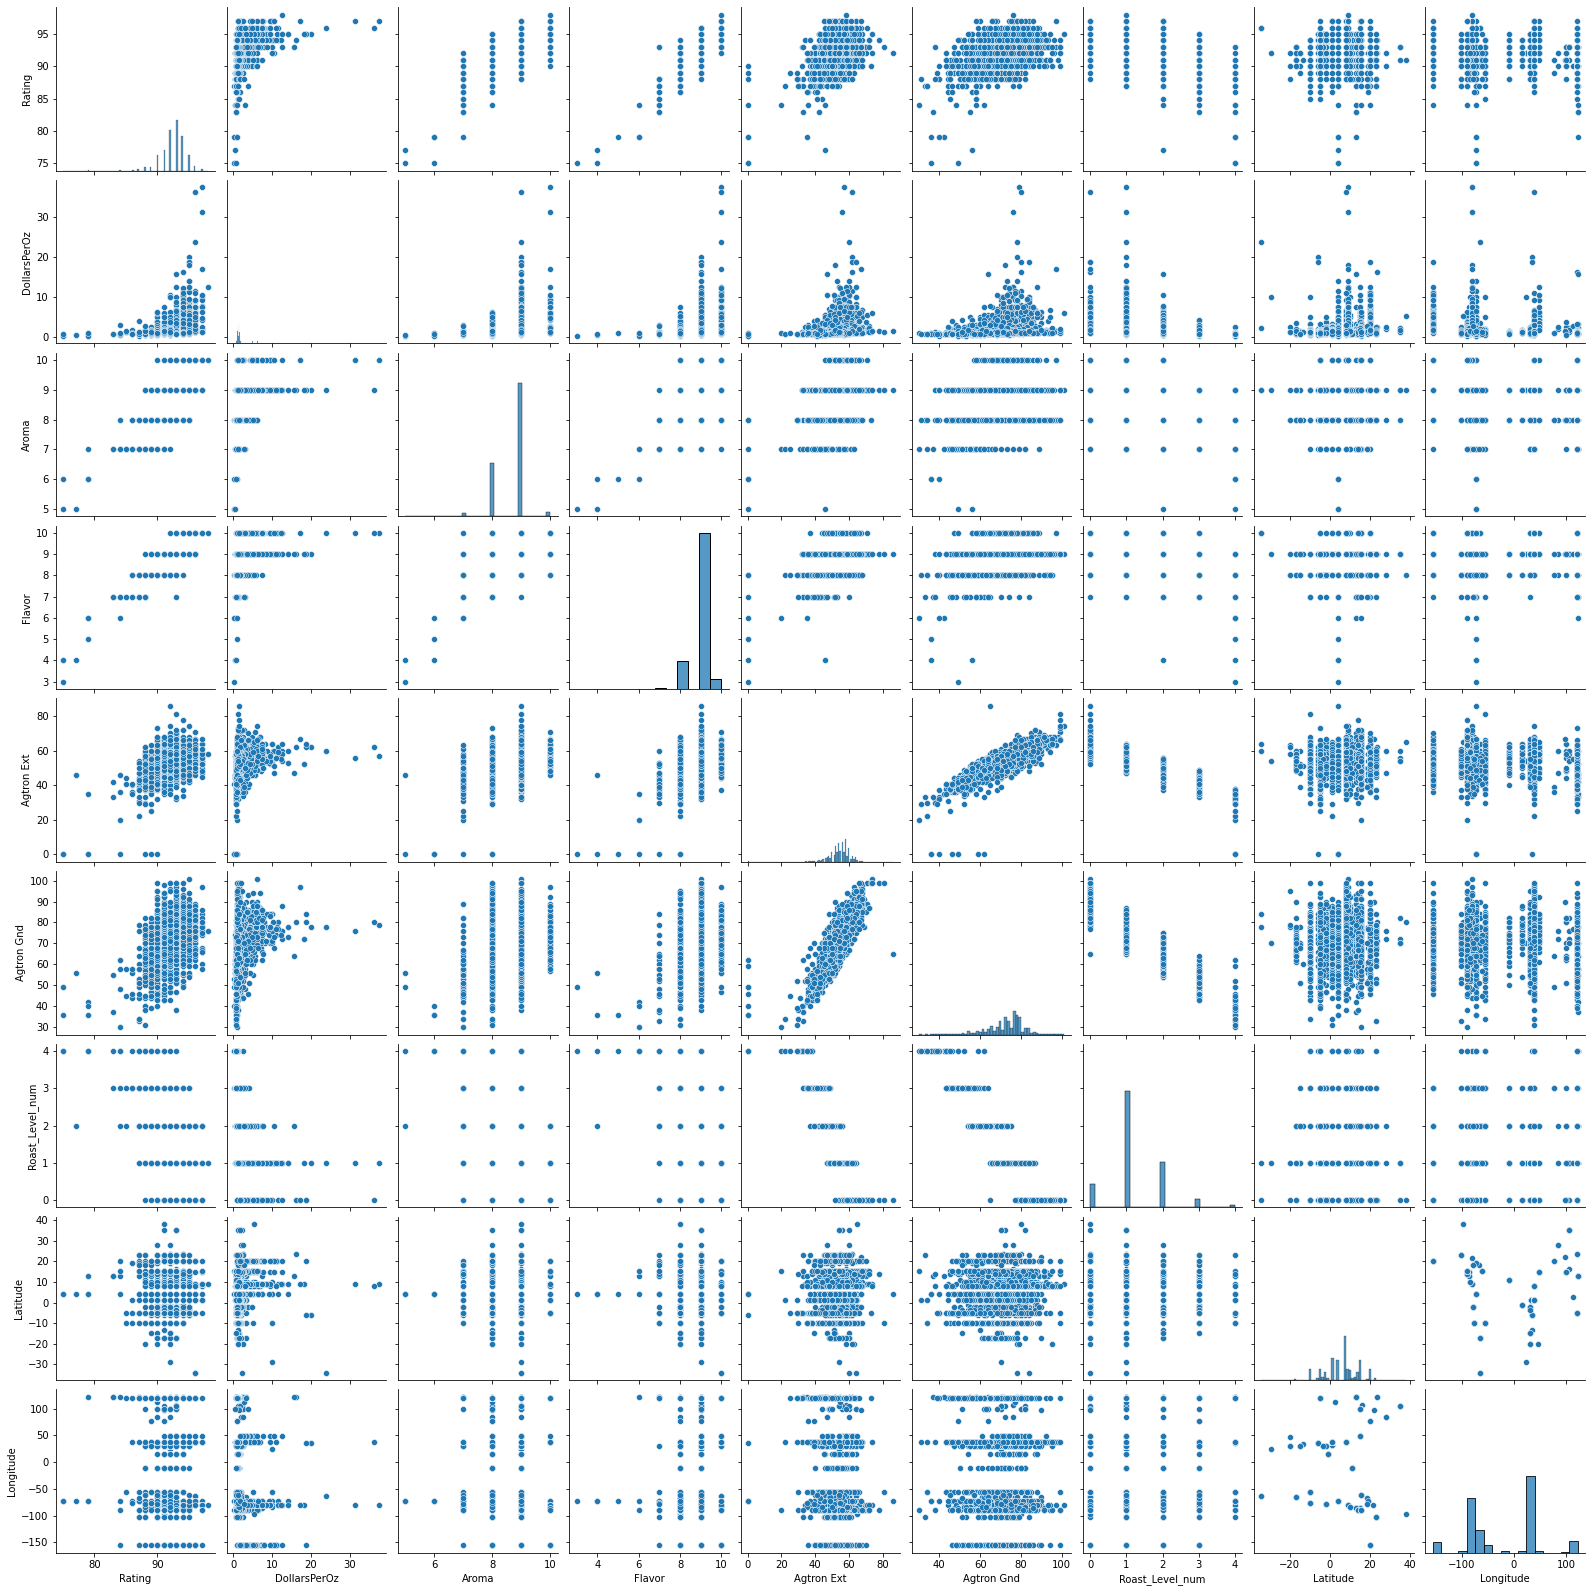

In [304]:
sns.pairplot(coffee_df)

We can further examine the relationships between each parameter through the pairplot below. We can further distinguish that the numerical correlation representation matches both the heatmap representation, as well as the graphical representation. We can see what the correlation value of -.815 between agtron grades looks like on the plotted data. Much of the other parameters have little relation to each other, and you can examine that through the scattered data in their models. For example, while agtron grades have a relationship, they have close to no relationship with Latitude.

One plot that is good to examine is the relationship between longitude and everything else. Many of the plots involving Longitude seem to be relatively clustered, but that doesn’t seem to be the case as much with latitude. This may inform us that the coffee that is being reviewed comes mostly from 4-5 main regions. Where are these regions? Those will be explored further on in the project.


As you can probably tell from the pairplot, there isn’t a whole lot of correlation in many of the parameters. There weren’t many parameters that were not affected by the reviewers bias. Things like aroma, flavor, body would clearly be graded to the reviewer’s likes and dislikes. There was going to be a clear correlation between these characteristics and the overall rating of the coffee because of the reviewer’s bias. Because of this, we found it important to consider the three variables that could not have been impacted by the reviewer’s bias at all: price per ounce; roast level, and location. 


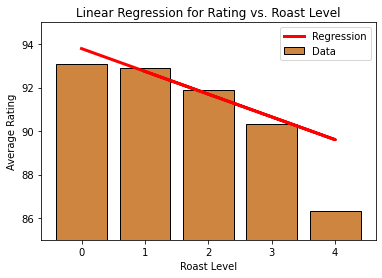

Equation: -1.05x + 93.79


In [139]:
rating_roast_ols = sm.ols(formula="Rating ~ Roast_Level_num", data=coffee_df).fit()
rating_roast_ols.summary()
params = rating_roast_ols.params

bar_dict = {}
for i in range(5):
    roast_df = coffee_df[coffee_df["Roast_Level_num"] == i]
    bar_dict[i] = roast_df["Rating"].mean()

names = list(bar_dict.keys())
values = list(bar_dict.values())

plt.bar(range(len(bar_dict)), values, tick_label=names, color="peru", edgecolor='black')
plt.plot(coffee_df['Roast_Level_num'],rating_roast_ols.predict(),color='red',linewidth=3)
plt.ylim([85, 95])
plt.xlabel('Roast Level')
plt.ylabel('Average Rating')
plt.title("Linear Regression for Rating vs. Roast Level")
plt.legend(["Regression", "Data"])
plt.show()
params[0]
params[1]
print("Equation: " + str(round(params[1], 2)) + "x + " + str(round(params[0], 2)))

Let us first consider the relationship between roast level and rating. Through this bar graph, we can see a clear negative relationship between roast level and average rating. We can see that the lighter roasts are rated higher on average and darker roasts are rated much lower on average. The R^2 value for this data is .164 which doesn’t suggest that the rating can be explained by the roast level. Although the data is not linear, we can see a downward trend which is supported by the numerical correlation value of -.405 shown above in the correlations table.

This, of course, may still be biased towards the reviewer’s preferences, but the roast level value was not influenced at all by the reviewer which makes these values much more reliable. 


Equation: 1.67 ln(x) + 91.67


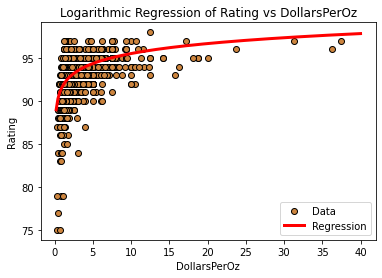

In [163]:
# Exploring Rating and DollarsPerOz
quad_model = np.poly1d(np.polyfit(np.log(coffee_df["DollarsPerOz"]), coffee_df["Rating"], 1))
plt.scatter(coffee_df["DollarsPerOz"], coffee_df["Rating"], color='peru', edgecolor='black');
x = np.linspace(-5, 40, 200)
plt.plot(x, quad_model(np.log(x)), 'r', linewidth=3);
plt.title("Logarithmic Regression of Rating vs DollarsPerOz")
plt.xlabel("DollarsPerOz")
plt.ylabel("Rating")
plt.legend(["Data", "Regression"])
print("Equation: " + str(round(quad_model[1], 2)) + " ln(x) + " + str(round(quad_model[0], 2)))

We can claim something similar with the relationship between price per ounce and rating.Consider the plot below. We can see that these two parameters follow a logarithmic model. This is extremely important to note. What this plot will tell us is that at some point, the price of the coffee has no relationship with the rating. This is a little puzzling, as higher quality products tend to cost more to produce or obtain. However, we can see that that relationship diminishes after a certain price. For this data, it looks like there is no relationship after approximately 12 dollars and before 1 dollar.

# Locations

The last variable that is independent of the reviewer’s bias is LOCATION In our efforts to create a geospatial representation of the origins of each coffee, we were able to obtain the latitude and longitude of each location and use geopandas to load a world map. Using the information we had on the origins of each coffee, we were able to pinpoint a central coordinate in each country that had produced at least one bean.

Below we can see the top 10 coffees that scored the highest in these reviews.

In [69]:
# Case study on top X rated coffees?
N = 10
topN = coffee_df.nlargest(N, "Rating")

top_coffees = coffee_df.sort_values(by="Rating",ascending=False)

top_coffees
topN

,Roaster,Name,Rating,Roaster Location,Coffee Origin,Roast Level,DollarsPerOz,Aroma,Flavor,Agtron Ext,Agtron Gnd,Roast_Level_num,Latitude,Longitude
440,Equator Coffees,Finca Sophia Gesha Washed,98,California,Panama,Medium-Light,12.50,10,10,58,76,1,9.0,-80.0
17,Paradise Roasters,Colombia Finca El Paraiso Geisha Letty,97,Minnesota,Colombia,Light,10.00,10,10,64,84,0,4.0,-72.0
111,Paradise Roasters,Mama Cata Mokkita,97,Minnesota,Panama,Medium-Light,37.50,10,10,57,79,1,9.0,-80.0
206,Barrington Coffee Roasting,Testi Ayla Double Ethiopia,97,Massachusetts,Ethiopia,Light,4.58,9,10,64,86,0,8.0,38.0
445,JBC Coffee Roasters,Ardent Ethiopia Natural,97,Wisconsin,Ethiopia,Medium-Light,4.38,10,10,57,77,1,8.0,38.0
747,Dragonfly Coffee Roasters,Washed Geisha Hacienda La Esmeralda Jaramillo ...,97,Colorado,Panama,Medium-Light,31.25,10,10,56,76,1,9.0,-80.0
801,JBC Coffee Roasters,Rukera Kenya,97,Wisconsin,Kenya,Medium-Light,1.77,10,10,54,78,1,1.0,38.0
802,JBC Coffee Roasters,Rukera Espresso,97,Wisconsin,Kenya,Medium-Light,1.77,10,10,54,78,1,1.0,38.0
874,Dragonfly Coffee Roasters,Kenya Karindundu AA Small Lot Reserve,97,Colorado,Kenya,Medium-Light,1.50,10,10,54,78,1,1.0,38.0
902,Bird Rock Coffee Roasters,Panama Ninety Plus Perci Lot 50,97,California,Panama,Medium-Light,7.50,10,10,50,74,1,9.0,-80.0


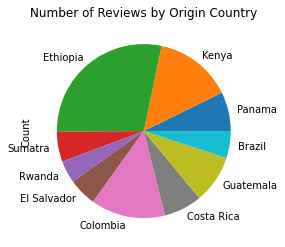

In [141]:
# Looking at the top N most common coffee origin countries
N = 10
topN_df = pd.DataFrame()

topN = coffee_df["Coffee Origin"].value_counts().nlargest(N).index.tolist()

for country in topN:
    country_df = coffee_df[coffee_df["Coffee Origin"] == country]
    country_dict = {"Country":country, "Count":len(country_df.index),"Mean Rating":country_df.Rating.mean(), "Mean Agtron Ext": country_df["Agtron Ext"].mean(), "Mean Agtron Gnd": country_df["Agtron Gnd"].mean(), "Mean Dollars/Oz":country_df["DollarsPerOz"].mean()}
    topN_df = topN_df.append(country_dict, ignore_index=True)

topN_df = topN_df.sort_values(by=['Mean Rating'], ascending=False)
    
topN_df = topN_df.set_index("Country")
topN_df.plot.pie(y="Count", legend=None);
plt.title("Number of Reviews by Origin Country");


### Global Analysis

As you can see below, many of the countries are below the hemisphere. The color of the dot in each country tells us what the mean rating of each coffee is in every country. We can see that the lowest rated coffees were coming from near the Dominican Republic and cuba. We can see three main clusters of places producing coffees are: South America, Africa, and a small cluster in Asia.


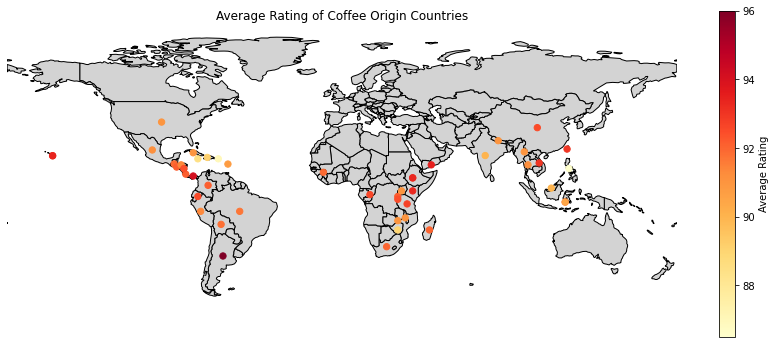

In [142]:
# Collecting all coffee origin countries and putting characteristics into a dataframe
origins_df = pd.DataFrame()
latlong_df =  pd.read_csv("latlongcountries.csv")

countries = coffee_df["Coffee Origin"].value_counts().index.tolist()

for country in countries:
    country_df = coffee_df[coffee_df["Coffee Origin"] == country]
    lat = latlong_df[latlong_df.Country == country].Latitude.values[0]
    long = latlong_df[latlong_df.Country == country].Longitude.values[0]

    country_dict = {"Country":country, "Count":len(country_df.index),"Average Rating":country_df.Rating.mean(), "Average Agtron Ext": country_df["Agtron Ext"].mean(), "Average Dollars/Oz":country_df["DollarsPerOz"].mean(), "Latitude": lat, "Longitude": long}
    origins_df = origins_df.append(country_dict, ignore_index=True)

fig, ax = plt.subplots(figsize=(15,6))
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries = countries[countries.name != "Antarctica"]

geoplot.polyplot(countries,facecolor='lightgray', ax=ax)

# Filter out countries that have less than 5 reviews from there
origins_df_filt = origins_df[origins_df["Count"] >= 10]

origins_df.plot(x="Longitude", y="Latitude", s=40,kind="scatter", c="Average Rating", ax=ax, cmap="YlOrRd");

plt.title("Average Rating of Coffee Origin Countries");

However, for analysis purposes, we are choosing to only consider locations that had more than 10 reviews. This will allow us to examine more accurately which countries are most significant to the review process so that we can understand the relationships between each review characteristics among each cluster region. We aim to understand if the differences among the best-performing or highest-producing regions are significant, or if there are any differences. 


### Anova Hypothesis Testing

In order to identify whether there is a statistically significant difference between the mean ratings of every country, we conducted an ANOVA test with all the countries that have more than 10 reviews. The results of the test indicated that the difference in means between countries is statistically significant. The Anova test outputted a p-value of 2.07e-79 and a F-statistic of 18.8. Thus, there is sufficient evidence to suggest that where the coffee comes impacts the final rating of the coffee.


In [143]:
ratings_arr = []

for country in origins_df_filt.Country.values.tolist():
    country_df = coffee_df[coffee_df["Coffee Origin"] == country]
    ratings = country_df["Rating"].values.tolist()
    ratings_arr.append(ratings)

anova_test = stats.f_oneway(ratings_arr[0], ratings_arr[1], ratings_arr[2], ratings_arr[3],ratings_arr[4], ratings_arr[5],ratings_arr[6], ratings_arr[7],ratings_arr[8], ratings_arr[9],ratings_arr[10], ratings_arr[11],ratings_arr[12], ratings_arr[13],ratings_arr[14], ratings_arr[15],ratings_arr[16], ratings_arr[17],ratings_arr[18], ratings_arr[19],ratings_arr[20], ratings_arr[21],ratings_arr[22], ratings_arr[23],ratings_arr[24], ratings_arr[25], ratings_arr[26])
print(f"F-statistic: {round(anova_test.statistic, 3)}, P-value: {anova_test.pvalue}")

F-statistic: 18.83, P-value: 1.4711535687877555e-79


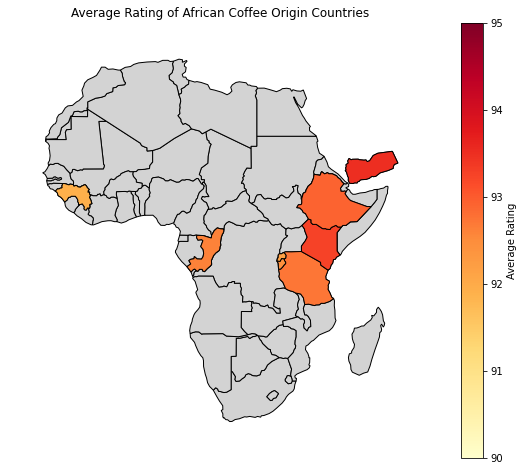

In [144]:
# Africa plot 
fig, ax = plt.subplots(figsize=(10,8))

africa = countries.query('continent == "Africa"')
yemen = countries[countries.name == "Yemen"]
africa = africa.append(yemen)

africa_df = pd.DataFrame()
rating_dict_africa = {}
        
for country in africa.name:
    if country.lower() in list(map(lambda s: s.lower().strip(), origins_df_filt["Country"].values.tolist())):
        country_df = origins_df_filt[origins_df_filt["Country"] == country]
        rating_dict_africa[country] = country_df["Average Rating"].values[0]    
        africa_df = africa_df.append(country_df)
        
review_countries_africa = africa[africa.name.isin(origins_df_filt["Country"].values.tolist())]

norm = plt.Normalize(vmin=90, vmax=95)
cmap = plt.cm.ScalarMappable(norm=norm, cmap='YlOrRd')

geoplot.choropleth(review_countries_africa,hue=rating_dict_africa.values(), cmap=cmap.cmap,norm=norm, ax=ax);
geoplot.polyplot(africa,facecolor='lightgray',ax=ax);
cbar = ax.figure.colorbar(cmap)
cbar.set_label("Average Rating")
ax.title.set_text("Average Rating of African Coffee Origin Countries")

africa_reviews_df = pd.DataFrame()

for idx, review in coffee_df.iterrows():
    name = review["Coffee Origin"]
    found = False
    
    for country in africa.name:
        if country.lower().strip() in name.lower().strip():
            africa_reviews_df = africa_reviews_df.append(review)
            found = True
            break

Here we have a map depicting which parts of Africa have produced at least 10 coffees for our data set and the average rating for that area. We have included Yemen here since it is in this cluster and may have a more similar climate to Africa than Asia. As you can see, Yemen has a higher mean rating  than any other place in this cluster, scoring 93.5. However, there are only 26 coffee reviews available. For analysis purposes we will consider Kenya and Ethiopia only as Ethiopia has the highest rated review in Africa and Kenya has the highest review count.
Ethiopia shows up on the top 10 rated coffees data frame at number 4 and 5 with a ratings of 97, and kenya shows up as number 7, 8, 9 also with ratings of 97. 


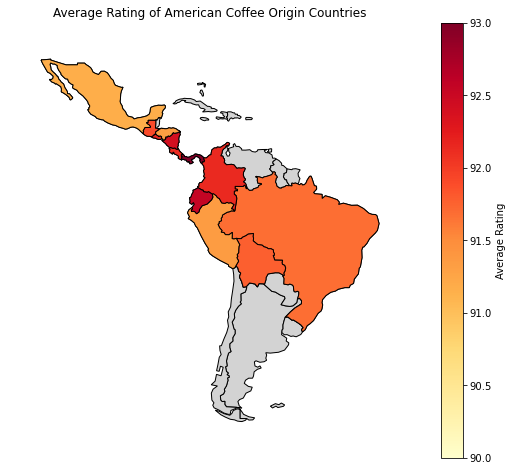

In [146]:
# North and South America plot
fig, ax = plt.subplots(figsize=(10,8))

SA = countries.query('continent == "South America"')
NA = countries.query('continent == "North America"')
NA = NA[countries.name != "United States of America"]
NA = NA[countries.name != "Canada"]
NA = NA[countries.name != "Greenland"]

america = NA.append(SA)

america_df = pd.DataFrame()
rating_dict_america = {}

for country in america.name:
    if country.lower() in list(map(lambda s: s.lower().strip(), origins_df_filt["Country"].values.tolist())):
        country_df = origins_df_filt[origins_df_filt["Country"] == country]
        rating_dict_america[country] = country_df["Average Rating"].values[0]    
        america_df = america_df.append(country_df)
        
review_countries_america = america[america.name.isin(origins_df_filt["Country"].values.tolist())]

norm = plt.Normalize(vmin=90, vmax=93)
cmap = plt.cm.ScalarMappable(norm=norm, cmap='YlOrRd')

geoplot.choropleth(review_countries_america,hue=rating_dict_america.values(), cmap=cmap.cmap,norm=norm, ax=ax);
geoplot.polyplot(america,facecolor='lightgray',
ax=ax);
cbar = ax.figure.colorbar(cmap)
cbar.set_label("Average Rating")
ax.title.set_text("Average Rating of American Coffee Origin Countries")

america_reviews_df = pd.DataFrame()

for idx, review in coffee_df.iterrows():
    name = review["Coffee Origin"]
    found = False
    
    for country in america.name:
        if country.lower().strip() in name.lower().strip():
            america_reviews_df = america_reviews_df.append(review)
            found = True
            break

Looking at the highest rated coffee in our data frame,, we can observe that the highest scoring coffee originates from Panama with a rating of 98 and shows up multiple times in the top 10 highest rated coffees of this data set. Panama also has the highest average rating at 94.1. For analysis purposes, we will consider one other producer: Columbia. Columbia produces the highest amount of coffee from South America in this data set with 304 reviews. Columbia also shows up on the top 10 rated list showing up at number 2 with a rating of 97

America Average Rating: 92.1
Africa Average Rating: 92.7


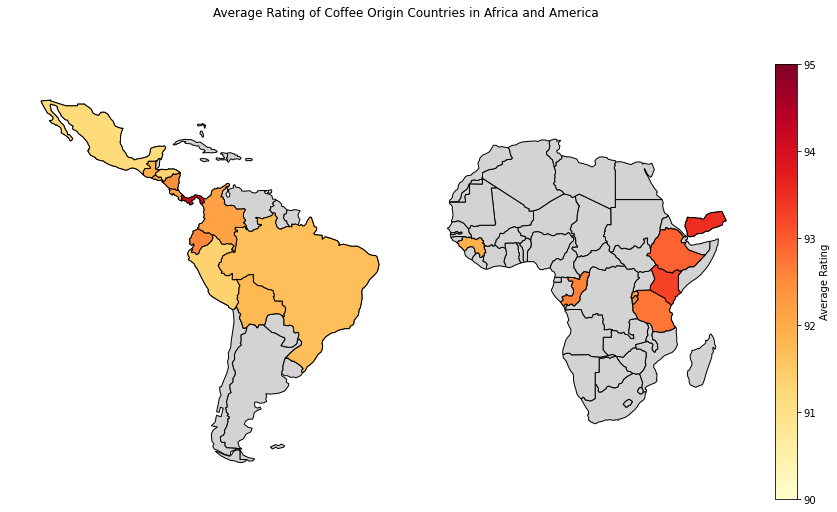

In [147]:
fig, axs = plt.subplots(1, 2, figsize=(15,8))
plt.subplots_adjust(wspace=0, hspace=0)

norm = plt.Normalize(vmin=90, vmax=95)
cmap = plt.cm.ScalarMappable(norm=norm, cmap='YlOrRd')

geoplot.choropleth(review_countries_america,hue=rating_dict_america.values(), cmap=cmap.cmap,norm=norm, ax=axs[0]);
geoplot.polyplot(america,facecolor='lightgray',
ax=axs[0]);
#axs[0].set_title("America Average Rating: " + str(round(america_df["Average Rating"].mean(), 1)))
print("America Average Rating: " + str(round(america_df["Average Rating"].mean(), 1)))
geoplot.choropleth(review_countries_africa,hue=rating_dict_africa.values(), cmap=cmap.cmap,norm=norm, ax=axs[1]);
geoplot.polyplot(africa,facecolor='lightgray',ax=axs[1]);
#axs[1].set_title("Africa Average Rating: " + str(round(africa_df["Average Rating"].mean(), 1)))
print("Africa Average Rating: " + str(round(africa_df["Average Rating"].mean(), 1)))
cbar = fig.colorbar(cmap)
cbar.set_label("Average Rating")
fig.suptitle("Average Rating of Coffee Origin Countries in Africa and America");

In [ ]:
Consider the who plots side by side. 

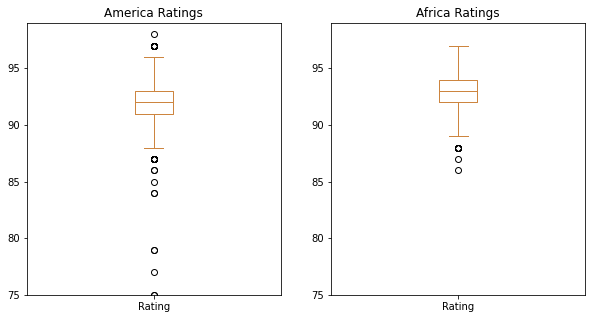

In [148]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
america_reviews_df["Rating"].plot(kind="box", ax=axs[0], color="peru");
africa_reviews_df["Rating"].plot(kind="box", ax=axs[1], color="peru");

axs[0].set_ylim([75,99]);
axs[1].set_ylim([75,99]);
axs[0].set_title("America Ratings");
axs[1].set_title("Africa Ratings");

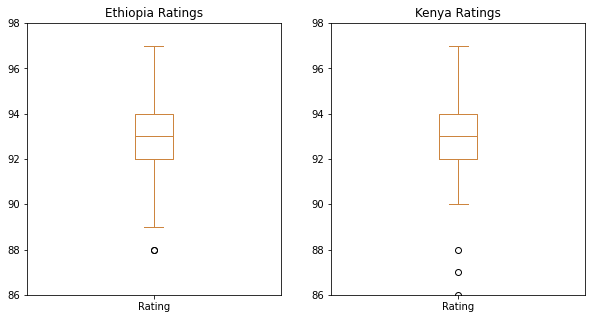

In [149]:
# Analyzing country-by-country
fig, axs = plt.subplots(1, 2, figsize=(10,5))

ethiopia_df = coffee_df[coffee_df["Coffee Origin"] == "Ethiopia"]
kenya_df = coffee_df[coffee_df["Coffee Origin"] == "Kenya"]

ethiopia_df["Rating"].plot(kind="box", ax=axs[0], color="peru");
kenya_df["Rating"].plot(kind="box", ax=axs[1], color="peru");
axs[0].set_ylim([86,98]);
axs[1].set_ylim([86,98]);
axs[0].set_title("Ethiopia Ratings");
axs[1].set_title("Kenya Ratings");

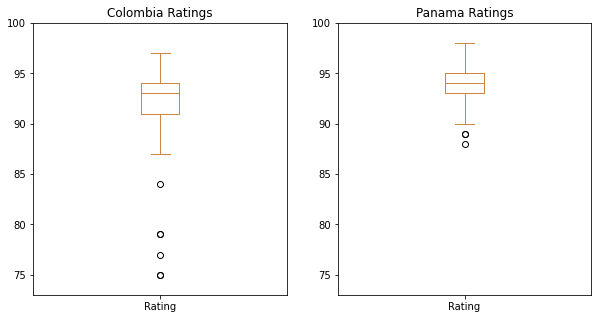

In [150]:
# Analyzing country-by-country
fig, axs = plt.subplots(1, 2, figsize=(10,5))

colombia_df = coffee_df[coffee_df["Coffee Origin"] == "Colombia"]
panama_df = coffee_df[coffee_df["Coffee Origin"] == "Panama"]

colombia_df["Rating"].plot(kind="box", ax=axs[0], color="peru");
panama_df["Rating"].plot(kind="box", ax=axs[1], color="peru");
axs[0].set_ylim([73,100]);
axs[1].set_ylim([73,100]);
axs[0].set_title("Colombia Ratings");
axs[1].set_title("Panama Ratings");


### Classification

In [151]:
# Regression model for predicting rating
rating_ols = sm.ols(formula="Rating ~ Roast_Level_num + DollarsPerOz", data=coffee_df).fit()
params = rating_ols.params
intercept = params[0]
roast_slope = params[1]
price_slope = params[2]

In [152]:
# Classification model for predicting coffee origin country
predicts = coffee_df[["Roast_Level_num", "DollarsPerOz"]].values
origins = coffee_df["Coffee Origin"].values

best_C = 50
svm_origins = svm.SVC(kernel='rbf', C = best_C,gamma='scale');
svm_origins.fit(predicts, origins);

In [153]:
# Classification model for predicting roaster
predicts = coffee_df[["Roast_Level_num", "DollarsPerOz"]].values
roasters = coffee_df["Roaster"].values

best_C = 0.1
svm_roasters = svm.SVC(kernel='rbf', C = best_C,gamma='scale');
svm_roasters.fit(predicts, roasters);

In [154]:
# Function to predict roaster, origin country, and rating from roast level and price
def predict(roast_level, price):
    priceperoz = price / 8 # assume an 8 oz. drink
        
    inputs = np.array([roast_level, priceperoz]).reshape(1, -1)
    roaster = svm_roasters.predict(inputs)[0]
    origin = svm_origins.predict(inputs)[0]
    rating = intercept + roast_slope * roast_level + price_slope * priceperoz
    rating = svm_ratings.predict(inputs)[0]
    return [roaster, origin, rating]

### Coffee Predictor Program

In [187]:
# Tkinter Program
global startup
global result4
startup = True

def getPredictions ():
    global startup
    global result4
    global result5
    global result6

    continue_bool = True
    try:
        roast_level = int(input1.get())

        if roast_level < 0 or roast_level > 4:
            raise ValueError()

    except ValueError:
        continue_bool = False
        messagebox.showerror('Value Error', "Error: input for roast level must be an integer between 0 and 4")
    if continue_bool:
        try:
            price = float(input2.get())
            if price <= 0:
                raise ValueError()
        except ValueError:
            messagebox.showerror('Value Error', "Error: price must be greater than $0")
            continue_bool = False
        if continue_bool:
            inputs = np.array([roast_level, price]).reshape(1, -1)
            roaster = svm_roasters.predict(inputs)[0]
            origin = svm_origins.predict(inputs)[0]
            rating = intercept + roast_slope * roast_level + price_slope * price
            if rating > 100:
                rating = 100
            if origin == "Hawaii" or origin == "Big Island":
                origin = "United States of America"
            elif origin == "Sumatra":
                origin = "Indonesia"
                
            if startup == True:
                startup = False  
            else:
                result4.config(text="") 
                result5.config(text="")                
                result6.config(text="")                

            result4 = tk.Label(root, text=origin, font=('helvetica', 21))
            result4.grid(row =4, column=0, pady = 2, padx = 1)
            result5 = tk.Label(root, text=roaster, font=('helvetica', 21))
            result5.grid(row =4, column=1, pady = 2, padx = 1)
            result6 = tk.Label(root, text=str(round(rating,2)), font=('helvetica', 21))
            result6.grid(row =4, column=2, pady = 2, padx = 1)            
            fig = plt.Figure(figsize = (8,8))
            ax = fig.add_subplot(111)
            canvas = FigureCanvasTkAgg(fig, master = root)  
            canvas.get_tk_widget().grid(row=5,column=1,pady=1,padx=1)
            countries = gpd.read_file(
                           gpd.datasets.get_path("naturalearth_lowres"))
                
            country = countries[countries.name == origin]
            continent = country.continent.values[0]
            continent = countries.query(f'continent == "{continent}"')
            color_dict = {country.name.values[0]: 100}
            
            norm = plt.Normalize(vmin=0, vmax=120)
            cmap = plt.cm.ScalarMappable(norm=norm, cmap='YlOrRd')
            geoplot.choropleth(country,hue=color_dict.values(), cmap=cmap.cmap, norm=norm, ax=ax);
            geoplot.polyplot(continent,facecolor='lightgray', ax=ax)
            canvas.draw()
            
root= tk.Tk()
root.title("Coffee Predictor")
root.geometry("600x400")
root.eval('tk::PlaceWindow . center')

label1 = tk.Label(root, text="Roast Level (0, 1, 2, 3, 4)",font=('helvetica', 15, 'bold'))
label1.grid(row =0, column=0, pady = 1, padx = 3)
label2 = tk.Label(root, text="Price Per Oz (> 0)",font=('helvetica', 15, 'bold'))
label2.grid(row=0, column=2, pady = 1, padx = 3)

input1 = tk.Entry(root)
input1.grid(row=1, column=0, pady = 5, padx = 5)
input2 = tk.Entry(root)
input2.grid(row=1, column=2, pady = 5, padx = 5)
button = tk.Button(text='Predict', command=getPredictions,  bg='peru', fg='white', font=('helvetica', 15, 'bold'))
button.grid(row=2, column=1, pady = 20)

result1 = tk.Label(root, text="Origin Country",font=('helvetica', 20, 'bold'))
result1.grid(row =3, column=0, pady = 1, padx = 1)
result2 = tk.Label(root, text="Roaster", font=('helvetica', 20, 'bold'))
result2.grid(row =3, column=1, pady = 1, padx = 1)
result3 = tk.Label(root, text="Rating", font=('helvetica', 20, 'bold'))
result3.grid(row =3, column=2, pady = 1, padx = 1)

root.grid_columnconfigure((0, 2), weight=1)

root.mainloop()

## Results

A summary of the results of the project

## Evaluation

What are the metrics used to evaluate how successful your project is?

## Project Summary

Answer specific questions below using only 1-2 sentences:

What is an overview of your project?

What are your project objectives?

What are your technical contributions?

What are the main results?

How are the results evaluated?

What are the future directions?